# Problem 1: Random Walk Monte Carlo

Load the Line Fitting dataset (line_fitting.csv) and plot the data.

Write your own Random Walk MCMC algorithm from scratch. Don't worry if it is slow or inefficient - this exercise is about intuition building, not results. Use your sampler to fit a line to the data and generate samples from the posterior. For a first pass, run the sampler for a fixed number of steps, $N$. Then, modify the sampler to automatically stop running when a target number of effective samples $N_{\rm eff}$ has been reached.

# Problem 2: Fitting a Line

Load the Line Fitting dataset (line_fitting.csv) and plot the data.

a) Fit the data using an ensemble sampler of your choice (recommendation: `emcee`)

b) Fit the data using a Hamiltonian Monte Carlo Sampler of your choice (recommendation: `PyMC` or `NumPyro`)

c) Fit the data using a nested sampler of your choice (recommendation: `dynesty`, `UltraNest`)

For all three cases, explicity write down the likelihood function; the `emcee` documentation has a clear explanation of how to do this. For Nested Sampling, you will also need to write a prior transform function; the `dynesty` documentation has a clear explanation of how to do this. Play around with using different priors (e.g. Gaussian, Uniform, Log-Uniform) to get a feel for the syntax of the different packages.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import pymc as pm
import dynesty

In [6]:
import pandas as pd
data=pd.read_csv('line_fitting.csv')
data

,Unnamed: 0,x,y,y_err
0,0,0.596779,8.112571,0.160314
1,1,0.921049,3.528151,0.513170
2,2,1.156184,4.810234,0.401530
3,3,1.754518,0.892382,0.372534
4,4,1.824917,3.132952,0.271382
5,5,2.268515,3.533380,0.252060
6,6,2.282632,1.899340,0.308511
7,7,2.504554,2.838963,0.440650
8,8,2.861393,0.897139,0.537728
9,9,2.937140,0.950002,0.355211


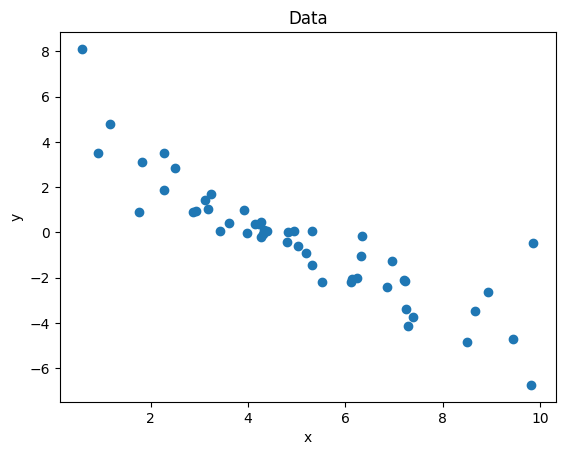

In [7]:
plt.plot(data['x'], data['y'], 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data')
plt.show()

In [15]:
!pip install tqdm

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)


In [22]:
#A: fit
import tqdm
import emcee

def model(theta, x):
    return theta[0] + theta[1] * x

def log_prior(theta):
    if -10 < theta[0] < 10 and -10 < theta[1] < 10:
        return 0.0
    return -np.inf

def log_likelihood(theta, x, y, yerr):
    model_y = model(theta, x)
    return -0.5 * np.sum(((y - model_y) / yerr) ** 2)

def log_post(theta, x, y, yerr):
    prior = log_prior(theta)
    if np.isinf(prior):
        return -np.inf
    else:
        return prior + log_likelihood(theta, x, y, yerr)
ndim, nwalkers,nsteps = 2, 100, 500
theta_0=np.array([6,-2])+np.random.randn(2,nwalkers).T
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_post, args=[data['x'], data['y'], data['y_err']])
sampler.run_mcmc(theta_0, nsteps, progress=True)

You must install the tqdm library to use progress indicators with emcee


State([[ 5.35551929 -1.09022204]
 [ 5.65871949 -1.1337783 ]
 [ 5.46644641 -1.11372688]
 [ 5.37920909 -1.09705612]
 [ 5.46132358 -1.10385946]
 [ 5.44541632 -1.09470682]
 [ 5.39728886 -1.09647508]
 [ 5.48566363 -1.11307637]
 [ 5.57755142 -1.1473816 ]
 [ 5.38619056 -1.10611906]
 [ 5.2975086  -1.08757494]
 [ 5.39142876 -1.09023329]
 [ 5.44293441 -1.10313148]
 [ 5.2455302  -1.08224327]
 [ 5.38218193 -1.10090812]
 [ 5.37138233 -1.09306022]
 [ 5.46831051 -1.09458947]
 [ 5.5332538  -1.12261425]
 [ 5.49400781 -1.12465346]
 [ 5.2753458  -1.08189486]
 [ 5.4917116  -1.10979599]
 [ 5.52584059 -1.12881107]
 [ 5.46578219 -1.11073406]
 [ 5.47944289 -1.10741928]
 [ 5.51291714 -1.13104431]
 [ 5.42448505 -1.11450459]
 [ 5.4264369  -1.10553588]
 [ 5.27268702 -1.06863635]
 [ 5.34039934 -1.0821936 ]
 [ 5.46943172 -1.11572604]
 [ 5.48114329 -1.11599574]
 [ 5.38425173 -1.09915266]
 [ 5.50741778 -1.11818344]
 [ 5.5506048  -1.12424771]
 [ 5.5323092  -1.11760855]
 [ 5.34845652 -1.10122247]
 [ 5.59298718 -1.12710

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 10;
tau: [20.66810533 16.3990393 ]

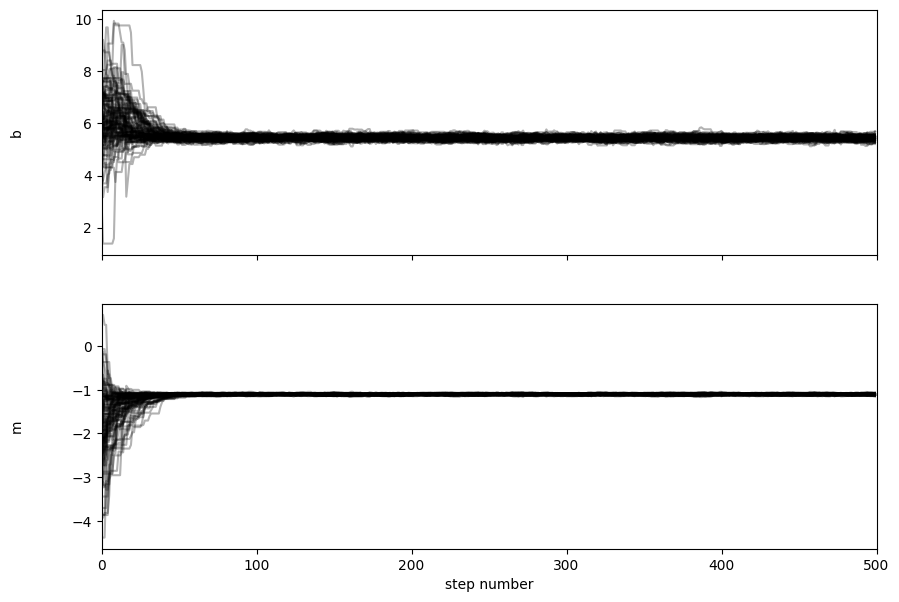

In [26]:

fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["b", "m"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number")


tau = sampler.get_autocorr_time()

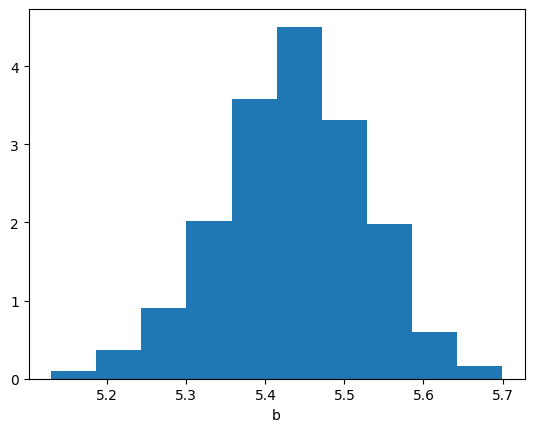

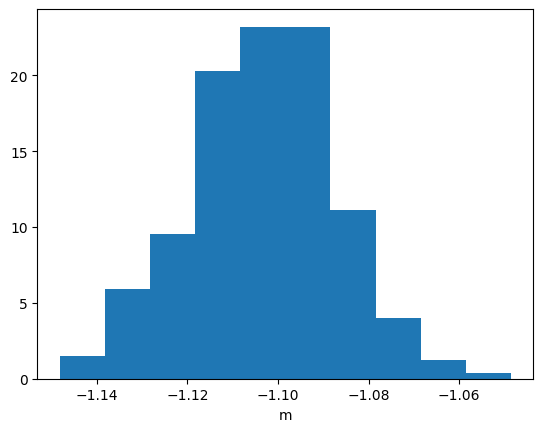

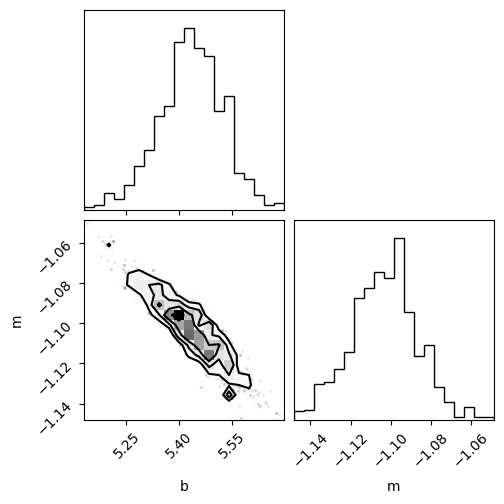

In [31]:
samples.shape

samples_last_10_steps=samples[-10:, :, :]

plt.hist(samples_last_10_steps[:, :, 0].flatten(), bins=10, density=True)
plt.xlabel('b')
plt.show()
plt.hist(samples_last_10_steps[:, :, 1].flatten(), bins=10, density=True)
plt.xlabel('m')
plt.show()


import corner
corner.corner(samples_last_10_steps.reshape(-1, 2), labels=labels)
plt.show()


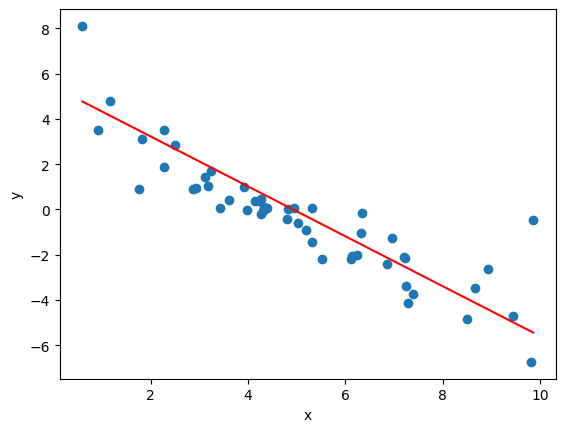

In [33]:
plt.plot(data['x'], data['y'], 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(data['x'], model([np.mean(samples_last_10_steps[:, :, 0]), np.mean(samples_last_10_steps[:, :, 1])], data['x']), 'r', label='Model')

plt.title('You manage to do a linear fit! maybe a bit to much')

In [64]:
#B

import pymc as pm


basic_model = pm.Model()

with basic_model:
    # Priors for unknown model parameters
    b = pm.Uniform("b", rng=(-10, 10),initval=6)
    m = pm.Uniform("m", rng=(-10, 10),initval=-2)

    # Expected value of outcome
    y = b + m * data['x']

    # Likelihood (sampling distribution) of observations
    y_obs = pm.Normal("y_obs", mu=y, sigma=data['y_err'], observed=data['y'])


    idata = pm.sample(3000)

Initializing NUTS using jitter+adapt_diag...


SamplingError: Initial evaluation of model at starting point failed!
Starting values:
{'b_interval__': array(nan), 'm_interval__': array(nan)}

Logp initial evaluation results:
{'b': np.float64(nan), 'm': np.float64(nan), 'y_obs': np.float64(nan)}
You can call `model.debug()` for more details.

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, m, sigma]


Output()

Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 1 seconds.


        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
b      4.573  0.408   3.819    5.360      0.006    0.004    4798.0    5182.0   
m     -0.981  0.074  -1.123   -0.844      0.001    0.001    4815.0    5247.0   
sigma  1.222  0.125   0.999    1.460      0.002    0.002    6479.0    5110.0   

       r_hat  
b        1.0  
m        1.0  
sigma    1.0  


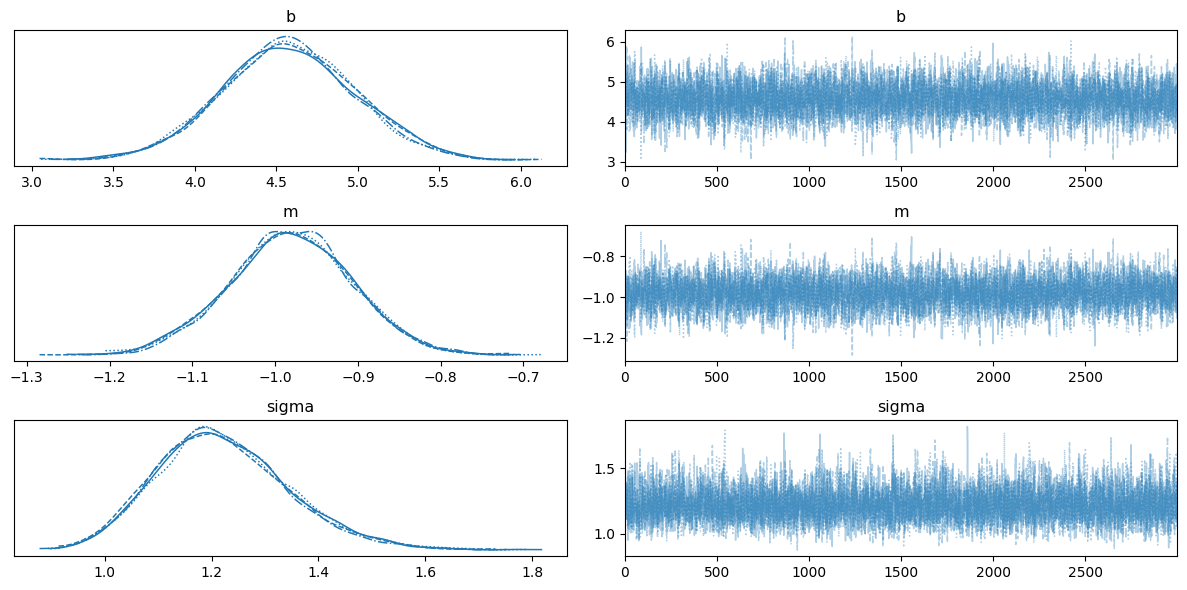

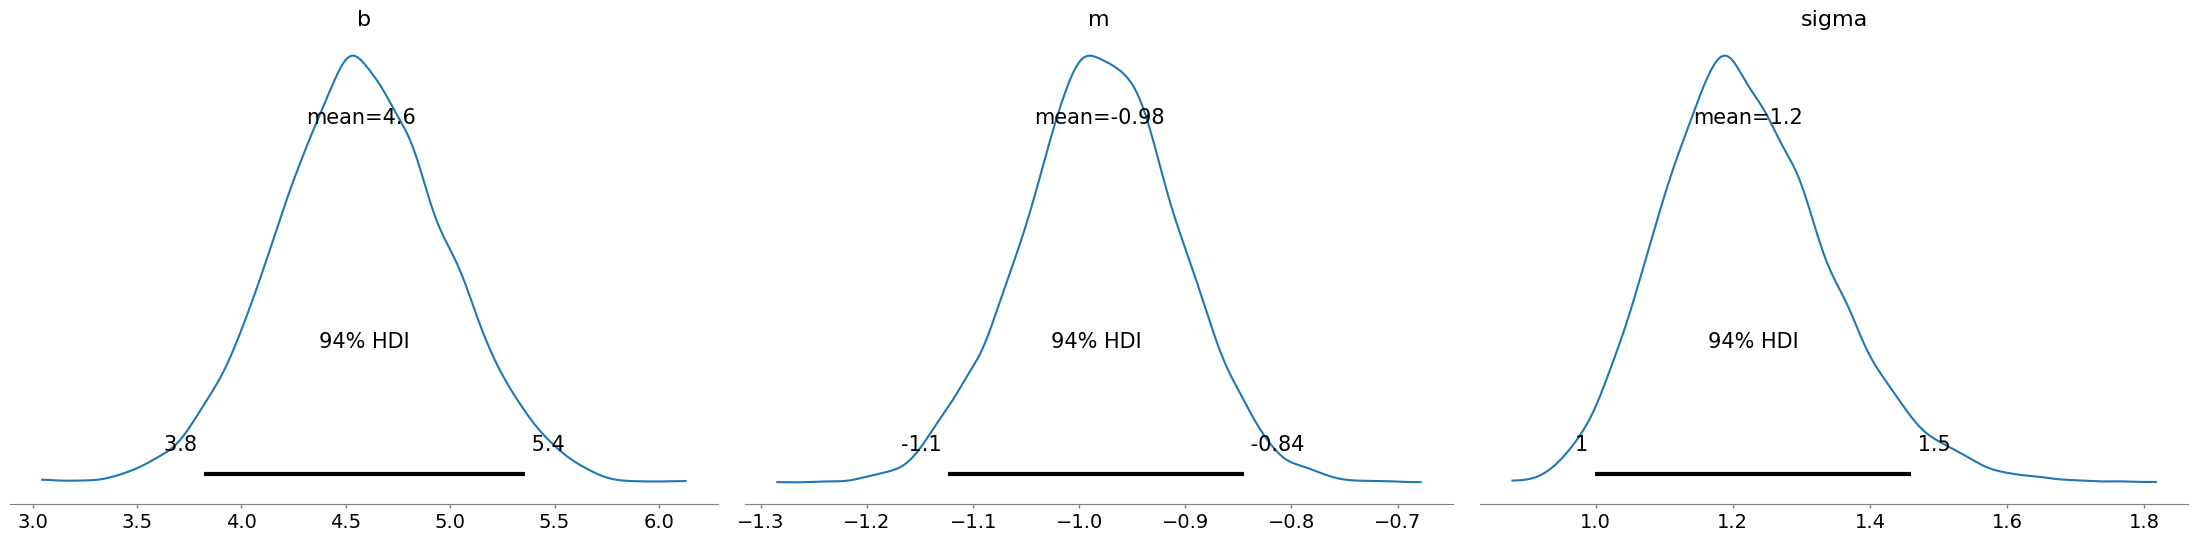

/Users/patriglesias/Desktop/PhD/lsst_datasciencefellow/.venv/lib/python3.12/site-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
/Users/patriglesias/Desktop/PhD/lsst_datasciencefellow/.venv/lib/python3.12/site-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


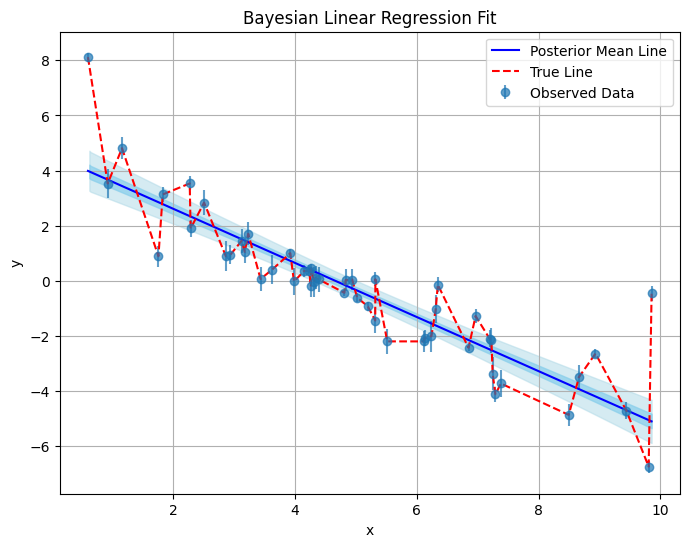

In [67]:
#Define the PyMC model ---
basic_model = pm.Model()

with basic_model:
    # Priors for unknown model parameters
    # b: intercept (conventionally 'intercept' or 'alpha')
    # m: slope (conventionally 'slope' or 'beta')
    # sigma: standard deviation of the likelihood (noise in observations)

    # We typically use more informative priors than Uniform if we have prior knowledge.
    # Normal priors are common. Let's use slightly wider Normals here.
    b = pm.Normal("b", mu=0, sigma=10) # Centered at 0 with a standard deviation of 10
    m = pm.Normal("m", mu=0, sigma=10) # Centered at 0 with a standard deviation of 10

    # The `initval` you had is generally for older PyMC3 versions or specific
    # sampler tuning; for `pm.sample` with NUTS, it's often not strictly necessary
    # or used differently.

    # Standard deviation of the noise. Must be positive.
    # HalfNormal, HalfCauchy are common choices.
    sigma = pm.HalfNormal("sigma", sigma=1) # A prior for the unknown noise level

    # Expected value of outcome (the linear regression line)
    # This is a deterministic variable
    y_expected = b + m * data['x']

    # Likelihood (sampling distribution) of observations
    # This connects the model to the observed data.
    # The 'observed' argument tells PyMC which part of the model is your actual data.
    y_obs = pm.Normal("y_obs", mu=y_expected, sigma=sigma, observed=data['y'])
    # Note: If data['y_err'] represents the *known, fixed* error for *each* point,
    # and you want to use that directly instead of inferring a global `sigma`,
    # you would replace `sigma` with `data['y_err']` here.
    # E.g., `y_obs = pm.Normal("y_obs", mu=y_expected, sigma=data['y_err'], observed=data['y'])`
    # However, it's common to infer the noise level, so `sigma` is often a good choice.


# --- 3. Perform Inference (Sampling) ---
with basic_model:
    # pm.sample draws samples from the posterior distribution using MCMC (NUTS by default).
    # `draws`: number of posterior samples per chain (after tuning)
    # `tune`: number of tuning steps (warm-up) per chain, discarded by default
    # `chains`: number of independent Markov chains to run
    idata = pm.sample(draws=3000, tune=1000, chains=4, random_seed=42) # Added tune and chains for robust sampling


# --- 4. Analyze and Visualize Results ---
# Print a summary of the posterior distributions
print(az.summary(idata, var_names=["b", "m", "sigma"]))

# Plot the trace (posterior samples)
az.plot_trace(idata, var_names=["b", "m", "sigma"])
plt.tight_layout()
plt.show()

# Plot the posterior distributions
az.plot_posterior(idata, var_names=["b", "m", "sigma"])
plt.tight_layout()
plt.show()

# You can also plot the regression line with uncertainty
# Get posterior samples for slope and intercept
posterior_b = idata.posterior["b"].values.flatten()
posterior_m = idata.posterior["m"].values.flatten()

# Predict y values for a range of x values
x_plot = np.linspace(data['x'].min(), data['x'].max(), 100)
# Create multiple regression lines from posterior samples
posterior_lines = posterior_b[:, None] + posterior_m[:, None] * x_plot

# Plot the observed data and the posterior regression lines
plt.figure(figsize=(8, 6))
plt.errorbar(data['x'], data['y'], yerr=data['y_err'], fmt='o', label='Observed Data', alpha=0.7)
plt.plot(x_plot, posterior_lines.mean(axis=0), color='blue', label='Posterior Mean Line')
az.plot_hdi(x_plot, posterior_lines, hdi_prob=0.95, color='lightblue', fill_kwargs={'alpha': 0.5}, ax=plt.gca()) #, label='95% HDI'
az.plot_hdi(x_plot, posterior_lines, hdi_prob=0.50, color='skyblue', fill_kwargs={'alpha': 0.7}, ax=plt.gca()) #, label='50% HDI'
plt.plot(data['x'], data['y'], color='red', linestyle='--', label='True Line') # Plot true line for comparison
plt.xlabel("x")
plt.ylabel("y")
plt.title("Bayesian Linear Regression Fit")
plt.legend()
plt.grid(True)
plt.show()

array([[<Axes: title={'center': 'b'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'm'}>, <Axes: title={'center': 'm'}>]],
      dtype=object)

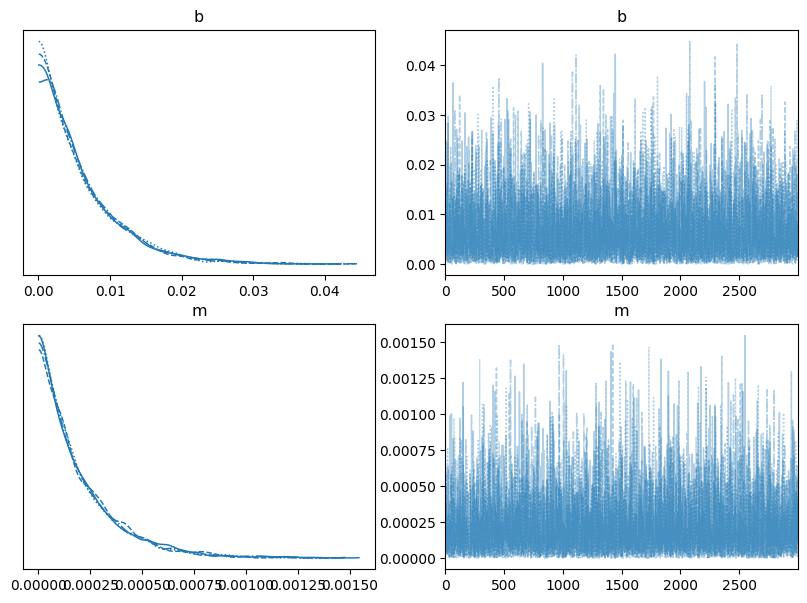

In [62]:
import arviz as az
az.plot_trace(idata, figsize=(10, 7))

In [47]:
idata.posterior

<xarray.Dataset> Size: 216kB
Dimensions:  (chain: 4, draw: 3000)
Coordinates:
  * chain    (chain) int64 32B 0 1 2 3
  * draw     (draw) int64 24kB 0 1 2 3 4 5 6 ... 2994 2995 2996 2997 2998 2999
Data variables:
    b        (chain, draw) float64 96kB 0.003458 0.01125 ... 0.00209 0.0179
    m        (chain, draw) float64 96kB 0.0003436 6.341e-05 ... 1.696e-05
Attributes:
    created_at:                 2025-05-21T15:32:36.698233+00:00
    arviz_version:              0.21.0
    inference_library:          pymc
    inference_library_version:  5.22.0
    sampling_time:              0.8547348976135254
    tuning_steps:               1000

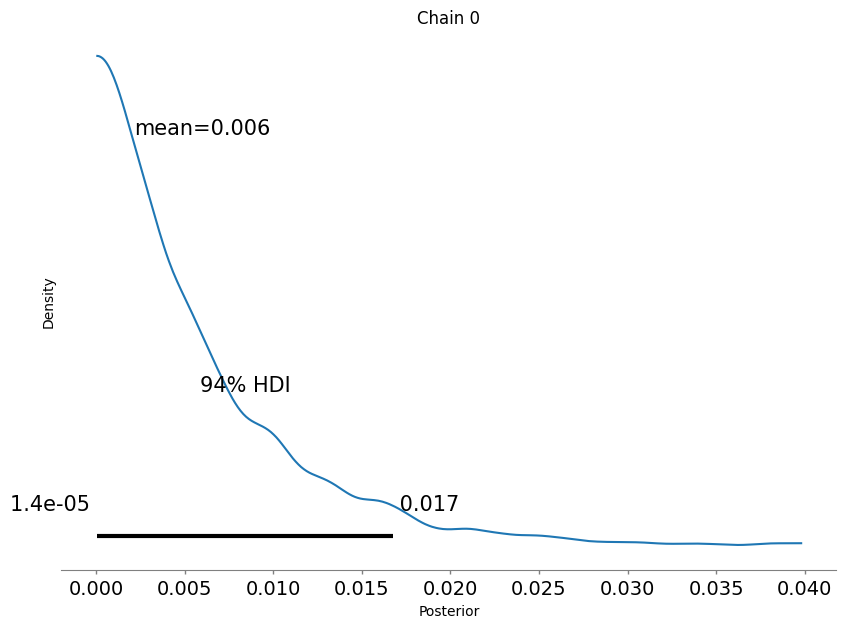

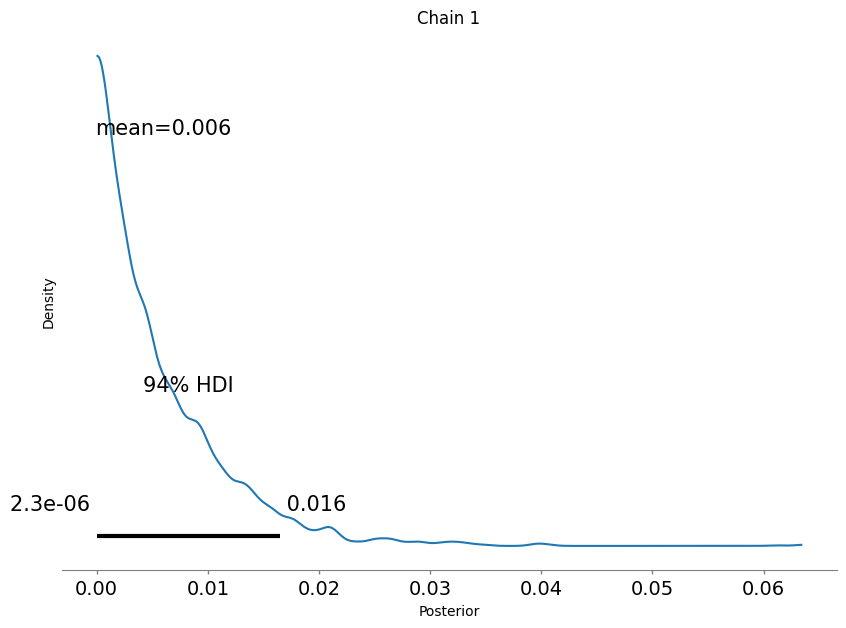

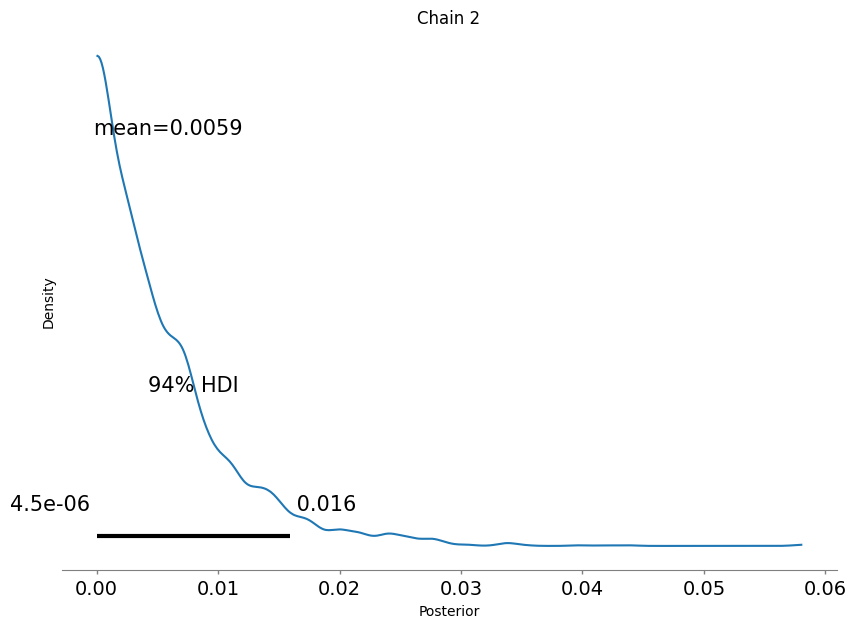

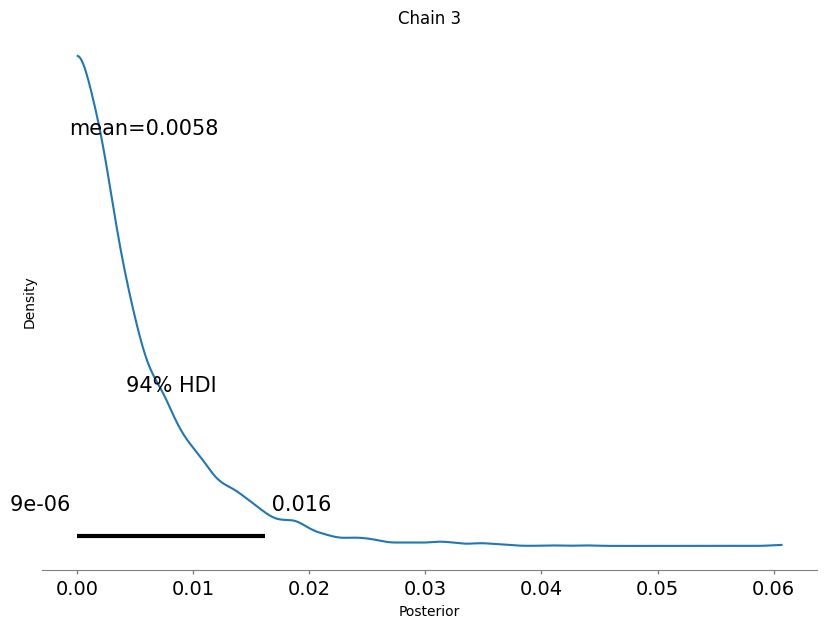

In [52]:
x_arr=np.zeros((len(data['x']), 4,3000))
for i in range(4):
    plt.figure(figsize=(10, 7))
    az.plot_posterior(idata, var_names=['b', 'm'], coords={'chain': [i]}, ax=plt.gca(), color='C0')
    plt.title(f"Chain {i}")
    plt.xlabel('Posterior')
    plt.ylabel('Density')
    plt.show()
    for j in range(3000):
        x_arr[:, i, j] = data['x']


In [58]:
import xarray as xr
xr.DataArray(data['x'])

<xarray.DataArray 'x' (dim_0: 50)> Size: 400B
array([0.59677897, 0.9210494 , 1.15618395, 1.75451756, 1.8249173 ,
       2.26851454, 2.28263231, 2.50455365, 2.86139335, 2.93714046,
       3.12261223, 3.17285482, 3.22958914, 3.43178016, 3.61788656,
       3.92117518, 3.98044255, 4.14826212, 4.2310646 , 4.2583029 ,
       4.26351307, 4.30862763, 4.33701173, 4.38572245, 4.80931901,
       4.83034264, 4.93685098, 5.01836676, 5.19485119, 5.31551374,
       5.31827587, 5.51314769, 6.11023511, 6.12894526, 6.23952952,
       6.30976124, 6.34400959, 6.84829739, 6.96469186, 7.1946897 ,
       7.22443383, 7.24455325, 7.29049707, 7.37995406, 8.49431794,
       8.66309158, 8.93389163, 9.44160018, 9.80764198, 9.85559786])
Coordinates:
  * dim_0    (dim_0) int64 400B 0 1 2 3 4 5 6 7 8 ... 41 42 43 44 45 46 47 48 49

/Users/patriglesias/Desktop/PhD/lsst_datasciencefellow/.venv/lib/python3.12/site-packages/arviz/plots/lmplot.py:212: UserWarning: posterior_predictive not found in idata
  warnings.warn("posterior_predictive not found in idata", UserWarning)


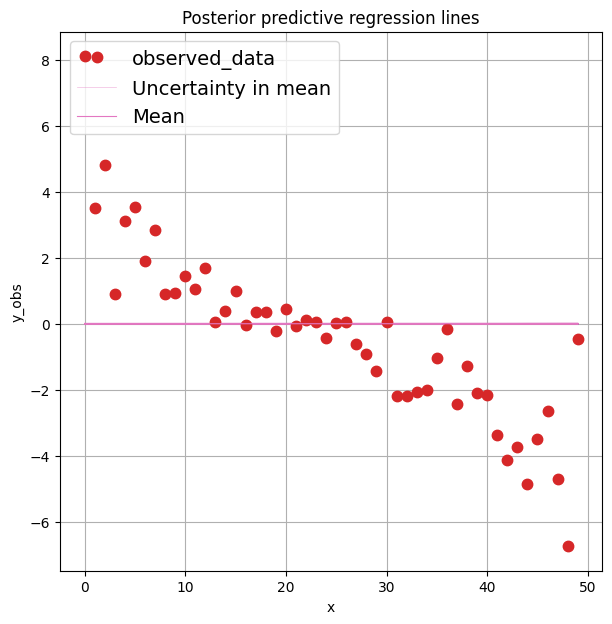

In [59]:
idata.posterior["y_model"] = idata.posterior["b"] + idata.posterior["m"] * xr.DataArray(data['x'])
_, ax = plt.subplots(figsize=(7, 7))
az.plot_lm(idata=idata, y="y_obs", num_samples=100, axes=ax, y_model="y_model")
ax.set_title("Posterior predictive regression lines")
ax.set_xlabel("x");

# Problem 3: Astrophysics

Select an astrophysical dataset of your choosing. Fit the data using (a) an ensemble sampler, (b) HMC, and (c) Nested Sampling. Verify that the three methods produce equivalent results.